In [272]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
pd.set_option("display.expand_frame_repr", False)
pd.set_option('display.max_rows', None)


In [274]:
df = pd.read_csv('game_product_data.csv')

In [275]:
print(df.head())

   listing_id  product_id  sku_id  retailer_id  points  geography_id  publisher_id  industry_id  importance release_date  lifecycle  current_age_months  remaining_lifecycle_months
0      529407        3829   33998         1243       0            78             3            1         1.0   2021-10-01       18.0                22.0                        -4.0
1      529559        3831   27559         1243       0            78             3            1         1.0   2021-10-01       18.0                22.0                        -4.0
2      529676        3831   27559         1246       0            89             3            1         1.0   2021-10-01       18.0                22.0                        -4.0
3      529681        3830   27384         1246       0            89             3            1         1.0   2021-10-01       18.0                22.0                        -4.0
4      529707        1030   14621         1246       0            89             1            1     

In [271]:
df = df.dropna()
df.drop(columns='release_date', inplace = True)


KeyboardInterrupt



In [170]:
grouped_df = df.groupby('publisher_id').agg({
    'sku_id': 'nunique',
    'product_id': 'nunique',
    'retailer_id': 'nunique',
    'points': ['sum', 'mean'],  
    'importance': lambda x: x.mode().iloc[0],
    'remaining_lifecycle_months': 'mean',
    'geography_id': 'nunique',
    'publisher_id': 'size'
 }).reset_index()

In [171]:
print(grouped_df.head())

  publisher_id  sku_id product_id retailer_id  points            importance remaining_lifecycle_months geography_id publisher_id
               nunique    nunique     nunique     sum       mean   <lambda>                       mean      nunique         size
0            1    1298         50         930  257739  12.520719        2.0                  22.383483           77        20585
1            2    1620         60        1014  299713  12.419733        1.0                  20.702511           79        24132
2            3    1764        110         983  401275  14.062062        1.0                   7.693405           79        28536
3            4    1542         69         913  327091  14.462814        1.0                   4.615715           78        22616
4            5     261         26         597   50087  14.792380        2.0                  19.500295           73         3386


In [173]:
grouped_df.columns = [
    'publisher_id',
    'num_skus',
    'num_products',
    'num_retailers',
    'total_points',
    'points_mean',
    'importance_mode',
    'remaining_lifecycle_months_mean',
    'num_geographies',
    'num_listings'
]

In [38]:
grouped_df.columns

Index(['publisher_id', 'num_skus', 'num_products', 'num_retailers',
       'total_points', 'points_mean', 'importance_mode',
       'remaining_lifecycle_months_mean', 'num_geographies', 'num_listings'],
      dtype='object')

In [174]:
grouped_df.head()

,publisher_id,num_skus,num_products,num_retailers,total_points,points_mean,importance_mode,remaining_lifecycle_months_mean,num_geographies,num_listings
0,1,1298,50,930,257739,12.520719,2.0,22.383483,77,20585
1,2,1620,60,1014,299713,12.419733,1.0,20.702511,79,24132
2,3,1764,110,983,401275,14.062062,1.0,7.693405,79,28536
3,4,1542,69,913,327091,14.462814,1.0,4.615715,78,22616
4,5,261,26,597,50087,14.792380,2.0,19.500295,73,3386


In [126]:
import math

penalty = lambda x: max(0, (math.exp(6 - x) -1) * (-2000))

# Rest of the code remains the same
weights = {
    'num_listings': 1.5,
    'num_skus': -3,
    'num_products': -7,
    'num_retailers': -180,
    'total_points': 2,
    'points_mean': 1,
    'importance_mode': 1,
    'remaining_lifecycle_months_mean': 100,
    'num_geographies': 0.5    
}

grouped_df['weighted_score'] = (
    grouped_df['num_listings'] * weights['num_listings'] +
    grouped_df['remaining_lifecycle_months_mean'] * weights['remaining_lifecycle_months_mean'] +
    grouped_df['importance_mode'] * weights['importance_mode'] +
    grouped_df['total_points'] * weights['total_points'] +
    grouped_df['points_mean'] * weights['points_mean'] +
    grouped_df['num_geographies'] * weights['num_geographies'] +
    grouped_df['num_retailers'] * weights['num_retailers'] +
    grouped_df['num_skus'] * weights['num_skus'] +
    grouped_df['num_products'] * weights['num_products'] +
    grouped_df['remaining_lifecycle_months_mean'].apply(penalty)
)


In [264]:
grouped_df.head()


,publisher_id,num_skus,num_products,num_retailers,total_points,points_mean,importance_mode,remaining_lifecycle_months_mean,num_geographies,num_listings,weighted_score
2,3,1764,110,983,401275,14.062062,1.0,7.693405,79,28536,828155.410580
15,19,2426,87,885,377481,13.111532,2.0,14.200313,78,28790,780714.360629
3,4,1542,69,913,327091,14.462814,1.0,4.615715,78,22616,674157.209104
1,2,1620,60,1014,299713,12.419733,1.0,20.702511,79,24132,620696.339769
16,20,896,111,742,287740,15.811628,2.0,20.669964,74,18198,591674.566436


In [163]:
import math

penalty = lambda x: max(0, (math.exp(6 - x) -1) * (-6000))

test_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for value in test_values:
    print(f"Value: {value}, Penalty: {penalty(value)}")

Value: 0, Penalty: 0
Value: 1, Penalty: 0
Value: 2, Penalty: 0
Value: 3, Penalty: 0
Value: 4, Penalty: 0
Value: 5, Penalty: 0
Value: 6, Penalty: 0
Value: 7, Penalty: 3792.723352971346
Value: 8, Penalty: 5187.988300580324
Value: 9, Penalty: 5701.277589792816
Value: 10, Penalty: 5890.106166667595


In [268]:
import math

penalty = lambda x: max(0, (math.exp(12 - x) -1) * (-12000))
penalty2 = lambda x: max(0, (math(1000 - x)  * (100)))

# Rest of the code remains the same
weights = {
    'num_listings': 10,
    'num_skus': -.5,
    'num_products': -1,
    'num_retailers': -2,
    'total_points': 2,
    'points_mean': 0.9,
    'importance_mode': 0.7,
    'remaining_lifecycle_months_mean': 0.8,
    'num_geographies': 0.1     
}

grouped_df['weighted_score'] = (
    grouped_df['num_listings'] * weights['num_listings'] +
    grouped_df['remaining_lifecycle_months_mean'] * weights['remaining_lifecycle_months_mean'] +
    grouped_df['importance_mode'] * weights['importance_mode'] +
    grouped_df['total_points'] * weights['total_points'] +
    grouped_df['points_mean'] * weights['points_mean'] +
    grouped_df['num_geographies'] * weights['num_geographies'] +
    grouped_df['num_retailers'] * weights['num_retailers'] +
    grouped_df['num_skus'] * weights['num_skus'] +
    grouped_df['num_products'] * weights['num_products'])
   ## grouped_df['remaining_lifecycle_months_mean'].apply(penalty) +
   # grouped_df['num_listings'].apply(penalty2)



In [258]:
grouped_df.sort_values(by=['weighted_score'], ascending=False).head(100)

,publisher_id,num_skus,num_products,num_retailers,total_points,points_mean,importance_mode,remaining_lifecycle_months_mean,num_geographies,num_listings,weighted_score
2,3,1764,110,983,401275,14.062062,1.0,7.693405,79,28536,828155.410580
15,19,2426,87,885,377481,13.111532,2.0,14.200313,78,28790,780714.360629
3,4,1542,69,913,327091,14.462814,1.0,4.615715,78,22616,674157.209104
1,2,1620,60,1014,299713,12.419733,1.0,20.702511,79,24132,620696.339769
16,20,896,111,742,287740,15.811628,2.0,20.669964,74,18198,591674.566436
9,11,1455,114,883,277154,13.762737,2.0,15.164068,76,20138,571872.017718
12,15,1364,137,830,259569,14.925479,2.0,20.142832,76,17391,534088.547197
0,1,1298,50,930,257739,12.520719,2.0,22.383483,77,20585,533542.275434
5,6,1079,94,799,209690,14.497373,2.0,17.197456,74,14464,431648.105600
7,8,860,47,727,197591,14.329611,1.0,20.044021,74,13789,407077.031866


In [265]:
grouped_df = grouped_df.sort_values(by=['weighted_score'], ascending=False)
print(grouped_df)

     publisher_id  num_skus  num_products  num_retailers  total_points  points_mean  importance_mode  remaining_lifecycle_months_mean  num_geographies  num_listings  weighted_score
2               3      1764           110            983        401275    14.062062              1.0                         7.693405               79         28536   828155.410580
15             19      2426            87            885        377481    13.111532              2.0                        14.200313               78         28790   780714.360629
3               4      1542            69            913        327091    14.462814              1.0                         4.615715               78         22616   674157.209104
1               2      1620            60           1014        299713    12.419733              1.0                        20.702511               79         24132   620696.339769
16             20       896           111            742        287740    15.811628            

In [267]:
grouped_df.sort_values(by=['weighted_score'], ascending=False).head(200)

,publisher_id,num_skus,num_products,num_retailers,total_points,points_mean,importance_mode,remaining_lifecycle_months_mean,num_geographies,num_listings,weighted_score
2,3,1764,110,983,401275,14.062062,1.0,7.693405,79,28536,828155.410580
15,19,2426,87,885,377481,13.111532,2.0,14.200313,78,28790,780714.360629
3,4,1542,69,913,327091,14.462814,1.0,4.615715,78,22616,674157.209104
1,2,1620,60,1014,299713,12.419733,1.0,20.702511,79,24132,620696.339769
16,20,896,111,742,287740,15.811628,2.0,20.669964,74,18198,591674.566436
9,11,1455,114,883,277154,13.762737,2.0,15.164068,76,20138,571872.017718
12,15,1364,137,830,259569,14.925479,2.0,20.142832,76,17391,534088.547197
0,1,1298,50,930,257739,12.520719,2.0,22.383483,77,20585,533542.275434
5,6,1079,94,799,209690,14.497373,2.0,17.197456,74,14464,431648.105600
7,8,860,47,727,197591,14.329611,1.0,20.044021,74,13789,407077.031866


In [ ]:
grouped_df.sort_values(by=['weighted_score'], ascending=False).head(100)

,publisher_id,num_skus,num_products,num_retailers,total_points,points_mean,importance_mode,remaining_lifecycle_months_mean,num_geographies,num_listings,weighted_score
15,19,2426,87,885,377481,13.111532,2.0,14.200313,78,28790,255771.176966
2,3,1764,110,983,401275,14.062062,1.0,7.693405,79,28536,250124.374930
16,20,896,111,742,287740,15.811628,2.0,20.669964,74,18198,186697.173450
3,4,1542,69,913,327091,14.462814,1.0,4.615715,78,22616,182756.291431
1,2,1620,60,1014,299713,12.419733,1.0,20.702511,79,24132,154504.211563
9,11,1455,114,883,277154,13.762737,2.0,15.164068,76,20138,149995.999378
12,15,1364,137,830,259569,14.925479,2.0,20.142832,76,17391,140690.854769
0,1,1298,50,930,257739,12.520719,2.0,22.383483,77,20585,125113.645469
7,8,860,47,727,197591,14.329611,1.0,20.044021,74,13789,95176.080114
5,6,1079,94,799,209690,14.497373,2.0,17.197456,74,14464,93693.141377


In [ ]:
grouped_df.sort_values(by=['weighted_score'], ascending=False).head(100)

,publisher_id,num_skus,num_products,num_retailers,total_points,points_mean,importance_mode,remaining_lifecycle_months_mean,num_geographies,num_listings,weighted_score
15,19,2426,87,885,377481,13.111532,2.0,14.200313,78,28790,255771.176966
2,3,1764,110,983,401275,14.062062,1.0,7.693405,79,28536,250124.374930
16,20,896,111,742,287740,15.811628,2.0,20.669964,74,18198,186697.173450
3,4,1542,69,913,327091,14.462814,1.0,4.615715,78,22616,182756.291431
1,2,1620,60,1014,299713,12.419733,1.0,20.702511,79,24132,154504.211563
9,11,1455,114,883,277154,13.762737,2.0,15.164068,76,20138,149995.999378
12,15,1364,137,830,259569,14.925479,2.0,20.142832,76,17391,140690.854769
0,1,1298,50,930,257739,12.520719,2.0,22.383483,77,20585,125113.645469
7,8,860,47,727,197591,14.329611,1.0,20.044021,74,13789,95176.080114
5,6,1079,94,799,209690,14.497373,2.0,17.197456,74,14464,93693.141377


In [269]:
grouped_df.sort_values(by=['weighted_score'], ascending=False).head(100)

,publisher_id,num_skus,num_products,num_retailers,total_points,points_mean,importance_mode,remaining_lifecycle_months_mean,num_geographies,num_listings,weighted_score
2,3,1764,110,983,401275,14.062062,1.0,7.693405,79,28536,1.084979e+06
15,19,2426,87,885,377481,13.111532,2.0,14.200313,78,28790,1.039824e+06
3,4,1542,69,913,327091,14.462814,1.0,4.615715,78,22616,8.777012e+05
1,2,1620,60,1014,299713,12.419733,1.0,20.702511,79,24132,8.378843e+05
16,20,896,111,742,287740,15.811628,2.0,20.669964,74,18198,7.554566e+05
9,11,1455,114,883,277154,13.762737,2.0,15.164068,76,20138,7.531140e+05
0,1,1298,50,930,257739,12.520719,2.0,22.383483,77,20585,7.188073e+05
12,15,1364,137,830,259569,14.925479,2.0,20.142832,76,17391,6.906075e+05
5,6,1079,94,799,209690,14.497373,2.0,17.197456,74,14464,5.618241e+05
7,8,860,47,727,197591,14.329611,1.0,20.044021,74,13789,5.311780e+05


In [270]:
grouped_df.to_csv('ordered_publishers2.csv')

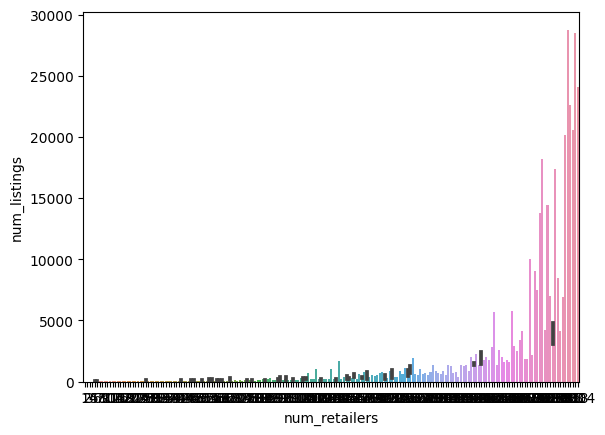

In [233]:
grouped_df['num_listings'].median()
listings = grouped_df['num_listings']
retailers = grouped_df['num_retailers']

sns.barplot( y= listings, x= retailers)
plt.show()

